In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [3]:
df.columns = df.columns.str.lower()

In [4]:
df.status.value_counts()

status
1    3200
2    1254
0       1
Name: count, dtype: int64

In [5]:
status_values = {
    1:'ok',
    2:'default',
    3:'uk'
}

df.status = df.status.map(status_values)
df.status.head()

0         ok
1         ok
2    default
3         ok
4         ok
Name: status, dtype: object

In [6]:
df.home.value_counts()

home
2    2107
1     973
5     783
6     319
3     247
4      20
0       6
Name: count, dtype: int64

In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1:'single',
    2:'married',
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'
}

df.marital = df.marital.map(marital_values)

record_values = {
    1:'no',
    2:'yes',
    3:'unk'
}

df.records = df.records.map(record_values)

job_values = {
    1:'fixed',
    2:'partime',
    3:'freelance',
    4:'others',
    0:'unk'
}

df.job = df.job.map(job_values)

df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
df = df[df.status!='uk'].reset_index(drop=True)

In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

In [13]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

y_train = (df_train.status=='default').astype('int').values
y_test = (df_test.status=='default').astype('int').values
y_val = (df_val.status=='default').astype('int').values


In [14]:
del df_train['status']
del df_test['status']
del df_val['status']

In [15]:
df_train

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,45.0,0.0,0.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,106.0,8500.0,0.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,86.0,0.0,0.0,350,975
2671,5,owner,60,58,married,no,freelance,45,93.0,45000.0,0.0,1500,2090


In [16]:
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'parttime':
            return 'default'
        else :
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [17]:
xi = df_train.iloc[10].to_dict()
assess_risk(xi)

'default'

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [19]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

In [20]:
dv = DictVectorizer(sparse = False)
X_train = dv.fit_transform(train_dicts)

In [21]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [23]:
y_pred = dt.predict_proba(X_val)[:,1]

roc_auc_score(y_val, y_pred)

np.float64(0.6715688698253377)

In [24]:
dt = DecisionTreeClassifier(max_depth= 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [25]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

np.float64(0.77933905239867)

In [26]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred)

np.float64(0.8050030924160434)

In [27]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- records=yes <= 0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- expenses <= 71.00
|   |   |   |   |--- class: 0
|   |   |   |--- expenses >  71.00
|   |   |   |   |--- class: 1
|   |   |--- income >  73.50
|   |   |   |--- amount <= 1128.00
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  1128.00
|   |   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- home=rent <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- home=rent >  0.50
|   |   |   |   |--- class: 1
|   |   |--- time >  27.00
|   |   |   |--- assets <= 7250.00
|   |   |   |   |--- class: 1
|   |   |   |--- assets >  7250.00
|   |   |   |   |--- class: 0
|--- records=yes >  0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- age <= 54.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  54.50
|   |   |   |   |--- class: 0
|   |   |--- income >  50.50
|   |   |   |--- assets <= 11500.00
|   |   |   |   |--

In [28]:
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

In [29]:
df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [30]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
4,5000,ok
3,5000,ok
0,8000,default
6,9000,ok


In [31]:
# from Ipython.display import display

thresholds = [0,2000,3000,4000,5000,8000]
for t in thresholds:
    print(f"threshold:{t}")
    df_left = df_example[df_example['assets'] <= t]
  
    df_right = df_example[df_example['assets'] > t]

    print(df_left)
    print(df_left.status.value_counts(normalize=True))
    print(df_right)
    print(df_right.status.value_counts(normalize=True))

threshold:0
   assets   status
2       0  default
status
default    1.0
Name: proportion, dtype: float64
   assets   status
0    8000  default
1    2000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default
status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64
threshold:2000
   assets   status
1    2000  default
2       0  default
status
default    1.0
Name: proportion, dtype: float64
   assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
7    3000  default
status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64
threshold:3000
   assets   status
1    2000  default
2       0  default
7    3000  default
status
default    1.0
Name: proportion, dtype: float64
   assets   status
0    8000  default
3    5000       ok
4    5000       ok
5    4000       ok
6    9000       ok
status
ok         0.8
default    0.2
Name: proportion, dtype: f

In [32]:
data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [33]:

df_example.sort_values('debt')
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}


for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


In [34]:
depths = [1,2,3,4,5,6,10,12,15,20,None]
from sklearn.tree import DecisionTreeClassifier

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"dpeth->{depth}, auc->{auc}")

dpeth->1, auc->0.6131750701491985
dpeth->2, auc->0.6876073869887143
dpeth->3, auc->0.763427236430611
dpeth->4, auc->0.77933905239867
dpeth->5, auc->0.7836468930394689
dpeth->6, auc->0.7730287148172412
dpeth->10, auc->0.6966248037676609
dpeth->12, auc->0.6935159890727944
dpeth->15, auc->0.6741677894658772
dpeth->20, auc->0.6700237332970742
dpeth->None, auc->0.6695880047961037


In [35]:
scores = []

for d in [4,5]:
    for s in [1,5,10,20,50,100,500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train,y_train)

        y_pred = dt.predict_proba(X_val)[:,1]

        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))

In [36]:
scores_df = pd.DataFrame(scores, columns=['depth','min_leaf_sample', 'auc'])
scores_df

,depth,min_leaf_sample,auc
0,4,1,0.779339
1,4,5,0.779339
2,4,10,0.773832
3,4,20,0.783517
4,4,50,0.778121
5,4,100,0.766987
6,4,500,0.671368
7,5,1,0.783647
8,5,5,0.786916
9,5,10,0.783199


In [37]:
scores_df.sort_values(by='auc', ascending=False)

,depth,min_leaf_sample,auc
11,5,50,0.788752
8,5,5,0.786916
12,5,100,0.786425
10,5,20,0.785229
7,5,1,0.783647
3,4,20,0.783517
9,5,10,0.783199
0,4,1,0.779339
1,4,5,0.779339
4,4,50,0.778121


In [38]:
dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 50)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)

In [39]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))


|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- amount <= 939.50
|   |   |   |   |--- class: 0
|   |   |   |--- amount >  939.50
|   |   |   |   |--- assets <= 3250.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- assets >  3250.00
|   |   |   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- seniority <= 11.50
|   |   |   |   |--- class: 0
|   |   |   |--- seniority >  11.50
|   |   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- expenses <= 71.00
|   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- expenses >  71.00
|   |   |   |   |--- class: 1
|   |   |--- income >  73.50
|   |   |   |--- amou

In [40]:
from sklearn.ensemble import RandomForestClassifier


In [41]:
scores = []

for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators=n, random_state =1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val,y_pred)

    scores.append((n,auc))

In [42]:
df_scores  = pd.DataFrame(scores, columns=['n_esitmators','auc'])
df_scores

,n_esitmators,auc
0,10,0.813555
1,20,0.834816
2,30,0.832822
3,40,0.830409
4,50,0.832084
5,60,0.829948
6,70,0.829840
7,80,0.831271
8,90,0.830539
9,100,0.831426


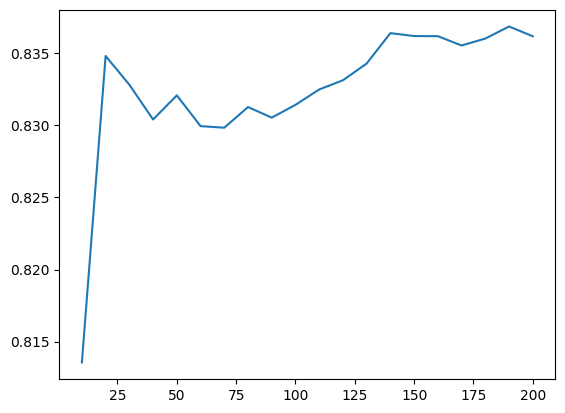

In [43]:
plt.plot(df_scores.n_esitmators, df_scores.auc)

In [44]:
scores = []

for d in [5,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators = n,
                                   max_depth=d,
                                   random_state = 1)
        rf.fit(X_train,y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n ,auc))

In [45]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'auc'])
df_scores

,max_depth,n_estimators,auc
0,5,10,0.816836
1,5,20,0.822319
2,5,30,0.821957
3,5,40,0.824540
4,5,50,0.828756
5,5,60,0.831389
6,5,70,0.831685
7,5,80,0.830919
8,5,90,0.831166
9,5,100,0.831209


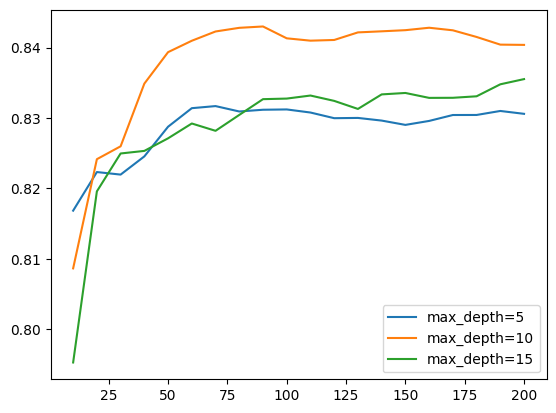

In [46]:
for d in [5,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]

    plt.plot(df_subset.n_estimators, df_subset.auc, label='max_depth=%d' %d)
plt.legend()

In [47]:
max_depth = 10

In [48]:
scores = []
for s in [1,3,5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators=n, max_depth = max_depth,
                                   random_state = 1, min_samples_leaf=s)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [49]:
columns = ['min_samples', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,min_samples,n_estimators,auc
0,1,10,0.808641
1,1,20,0.824145
2,1,30,0.825974
3,1,40,0.834874
4,1,50,0.839343
...,...,...,...
95,50,160,0.825115
96,50,170,0.825591
97,50,180,0.825795
98,50,190,0.826024


/tmp/ipykernel_7079/256247118.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


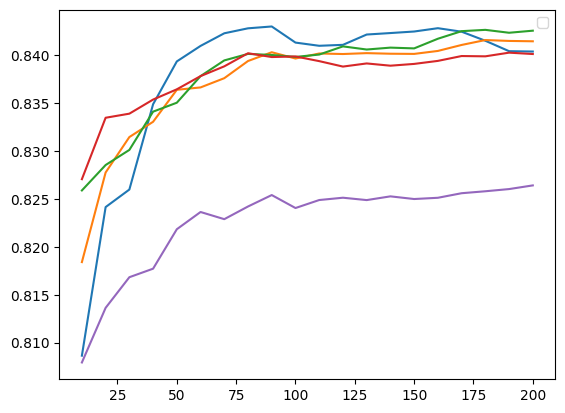

In [50]:
for s in [1,3,5,10,50]:
    df_subset = df_scores[df_scores['min_samples'] == s]
    plt.plot(df_subset.n_estimators, df_subset.auc)

plt.legend()

In [51]:
min_sample_leaf = 3

In [52]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth = max_depth,
                           min_samples_leaf = min_sample_leaf,
                           random_state = 1)
rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [53]:
y_pred = rf.predict_proba(X_val)[:,1]
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.8414442700156985)

In [54]:
!pip install xgboost

In [55]:
import xgboost as xgb

In [56]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'marital=divorced', 'marital=married',
       'marital=separated', 'marital=single', 'marital=unk',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [57]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = features)

In [58]:
xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'nthread' : 8,

    'seed' : 1,
    'verbosity' : 1
}

In [59]:
model = xgb.train(xgb_params, dtrain, num_boost_round = 10)

In [60]:
y_pred = model.predict(dval)

In [61]:
auc = roc_auc_score(y_val, y_pred)
auc

np.float64(0.8282333526990445)

In [62]:
watchlist = [(dtrain,'train'), (dval,'val')]

In [63]:
%%capture output

xgb_params = {
    'eta' : 0.3,
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',

    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval=4, 
                 evals = watchlist)

In [64]:
s = output.stdout

In [65]:
print(s[:200])

[0]	train-auc:0.85945	val-auc:0.79388
[4]	train-auc:0.91874	val-auc:0.82017
[8]	train-auc:0.94393	val-auc:0.82696
[12]	train-auc:0.95612	val-auc:0.82722
[16]	train-auc:0.96435	val-auc:0.82850
[20]	tra


In [66]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))

    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [67]:
df_scores = parse_xgb_output(output)
df_scores

,num_iter,train_auc,val_auc
0,0,0.85945,0.79388
1,4,0.91874,0.82017
2,8,0.94393,0.82696
3,12,0.95612,0.82722
4,16,0.96435,0.82850
5,20,0.97147,0.82688
6,24,0.97645,0.82602
7,28,0.98163,0.82502
8,32,0.98650,0.82152
9,36,0.99042,0.81962


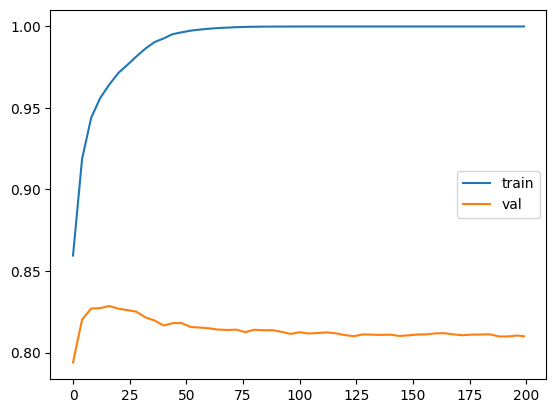

In [68]:
plt.plot(df_scores.num_iter, df_scores.train_auc, label='train')
plt.plot(df_scores.num_iter, df_scores.val_auc, label = 'val')
plt.legend()

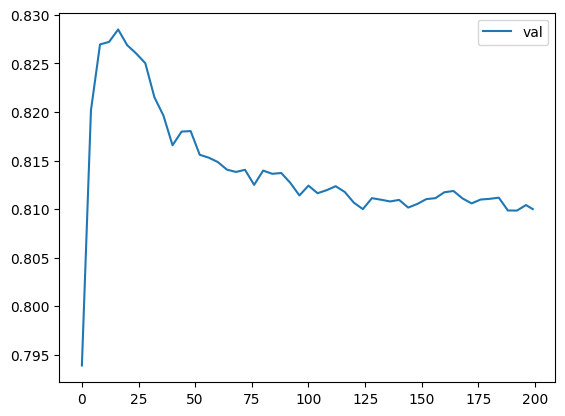

In [69]:
plt.plot(df_scores.num_iter, df_scores.val_auc, label='val')
plt.legend()

In [70]:
scores = {}

In [71]:
%%capture output

xgb_params = {
    'eta' : 0.01, 
    'max_depth' : 6,
    'min_child_weight' : 1,

    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',

    'nthread' : 8,
    'seed' : 1, 
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, verbose_eval = 5,
                 evals = watchlist)

scores = {}

In [72]:
key = f'eta = {xgb_params['eta']}'
scores[key] = parse_xgb_output(output)

In [73]:
eta = 0.01

In [74]:
scores

{'eta = 0.01':     num_iter  train_auc  val_auc
 0          0    0.85945  0.79388
 1          5    0.86743  0.79926
 2         10    0.87062  0.80196
 3         15    0.87804  0.81360
 4         20    0.88250  0.81613
 5         25    0.88756  0.81864
 6         30    0.88995  0.82034
 7         35    0.89095  0.81956
 8         40    0.89138  0.81809
 9         45    0.89180  0.81751
 10        50    0.89411  0.81879
 11        55    0.89686  0.81848
 12        60    0.89911  0.81932
 13        65    0.90098  0.81993
 14        70    0.90256  0.82131
 15        75    0.90384  0.82194
 16        80    0.90598  0.82296
 17        85    0.90759  0.82362
 18        90    0.90914  0.82438
 19        95    0.91097  0.82530
 20       100    0.91207  0.82546
 21       105    0.91344  0.82643
 22       110    0.91466  0.82704
 23       115    0.91611  0.82815
 24       120    0.91724  0.82888
 25       125    0.91837  0.82927
 26       130    0.91936  0.82994
 27       135    0.92025  0.83039


In [75]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [76]:

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [77]:
del scores['max_depth=10']


In [79]:
dt = DecisionTreeClassifier(max_depth = 6, min_samples_leaf = 15)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [80]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)


np.float64(0.7951241671714111)

In [81]:
rf = RandomForestClassifier(n_estimators=200,
                           max_depth = 10,
                           min_samples_leaf = 3,
                           random_state = 1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [88]:
y_pred = rf.predict_proba(X_val)[:, 1]


In [89]:
xgb_params = {
    'eta' : 0.1,
    'max_depth' : 3,
    'min_child_weight' : 1,
    'objective' : 'binary:logistic',
    'eval_metric' : 'auc',

    'nthread' : 8,
    'seed' : 1,
    'verbosity' : 1
}

model = xgb.train(xgb_params, dtrain, num_boost_round = 175)

In [91]:
y_pred = model.predict(dval)


In [94]:
df_full_train = df_full_train.reset_index(drop=True)
